In [1]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from tqdm.notebook import tqdm

In [2]:
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['axes.facecolor'] = 'gray'

# FP16 VS Inference time

In [4]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'sizes' :[7.05, 49.3, 105, 38.3, 46.2, 40.2],
                   'NCS2'  :[0.0372, 0.0668, 0.1227, 0.1828, 0.0539, 0.1429],
                'NCS2_Rasp':[0.0522, 0.0835, 0.1448, 0.2314, 0.0723, 0.1898],
                   'CPU'   :[0.0212, 0.0451, 0.0591, 0.1267, 0.0384, 0.0324],
                   'GPU'   :[0.0193, 0.0311, 0.0549, 0.0516, 0.0307, 0.0211],          
                'model'    :['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']})

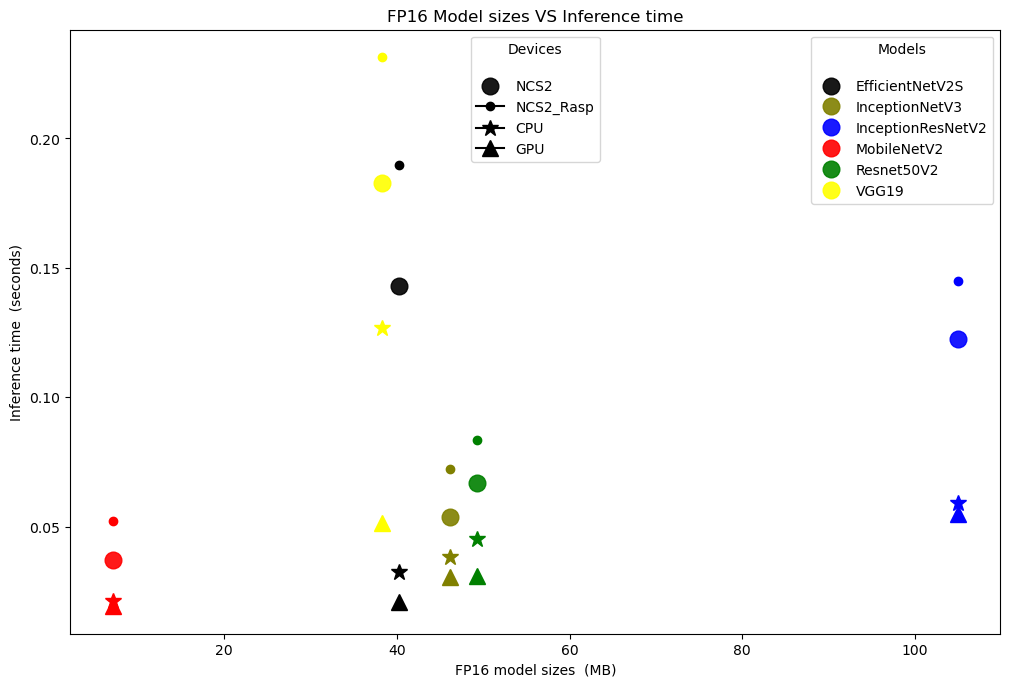

In [6]:
import matplotlib.pyplot as plt

colors = {'MobileNetV2':'red', 'Resnet50V2':'green', 'InceptionResNetV2':'blue', 'VGG19':'yellow', 'InceptionNetV3':'olive' , 'EfficientNetV2S':'black'}

groups = df.groupby('model')
for name, group in groups:
    plt.plot(group.sizes, group.NCS2, marker='o', linestyle='', alpha=0.9, markersize=12, label=name, color=colors[name])
    plt.plot(group.sizes, group.NCS2_Rasp, marker='.', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.CPU, marker='*', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.GPU, marker='^', markersize=12, color=colors[name])

first_leg=plt.legend(title="Models\n")
plt.xlabel('FP16 model sizes  (MB)')
plt.ylabel('Inference time  (seconds)')
plt.title('FP16 Model sizes VS Inference time')
plt.gca().add_artist(first_leg)
plt.legend(['NCS2','NCS2_Rasp','CPU','GPU'], loc='upper center', title="Devices\n")
plt.show()

# FP32 VS Inference time

In [7]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'sizes'    :[13.7, 98.1, 208, 91.6, 76.5, 78.4],
                   'NCS2'     :[0.0418, 0.0685, 0.1244, 0.1830, 0.0556, 0.1435],
                   'NCS2_Rasp':[0.0545, 0.0855, 0.1616, 0.2318, 0.0761, 0.1949],
                   'GPU'      :[0.0201, 0.0456, 0.0716, 0.1229, 0.0374, 0.0225],
                   'CPU'      :[0.0224, 0.0524, 0.0721, 0.1309, 0.0476, 0.0349],
                   'model'    :['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']})

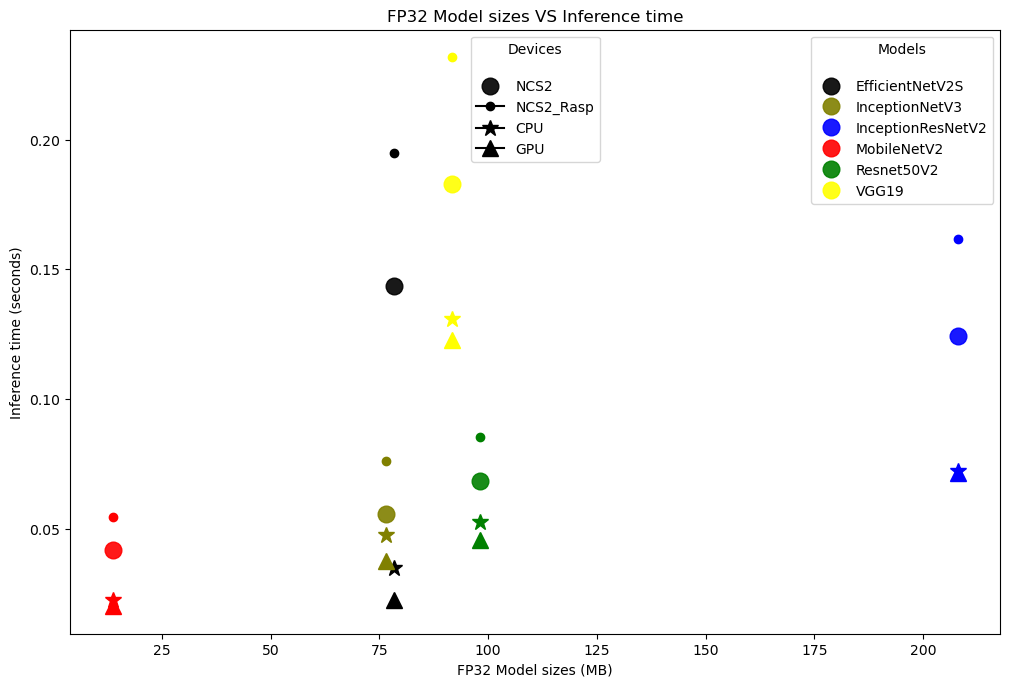

In [8]:
import matplotlib.pyplot as plt

colors = {'MobileNetV2':'red', 'Resnet50V2':'green', 'InceptionResNetV2':'blue', 'VGG19':'yellow', 'InceptionNetV3':'olive', 'EfficientNetV2S':'black'}

groups = df.groupby('model')
for name, group in groups:
    plt.plot(group.sizes, group.NCS2, marker='o', linestyle='', alpha=0.9, markersize=12, label=name, color=colors[name])
    plt.plot(group.sizes, group.NCS2_Rasp, marker='.', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.CPU, marker='*', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.GPU, marker='^', markersize=12, color=colors[name])

first_leg=plt.legend(title="Models\n")
plt.xlabel('FP32 Model sizes (MB)')
plt.ylabel('Inference time (seconds)')
plt.title('FP32 Model sizes VS Inference time')
plt.gca().add_artist(first_leg)
plt.legend(['NCS2','NCS2_Rasp','CPU','GPU'], loc='upper center', title="Devices\n")
plt.show()

# Load times

# FP16 Model size VS Load time

In [10]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'sizes' :[7.05, 49.3, 105, 38.3, 46.2, 40.2],
                   'NCS2'  :[1.9324, 1.9495, 3.3887, 2.0201, 2.0505, 3.0130],
                'NCS2_Rasp':[6.8928, 6.8800, 19.0833, 7.7566, 7.0261, 19.0142],
                   'CPU'   :[0.0699, 0.1686, 0.4907, 0.1019, 0.2049, 0.3893],
                   'GPU'   :[3.7681, 5.4119, 15.6516, 4.5191, 7.6198, 12.1733],    
                   
                'model'    :['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']})

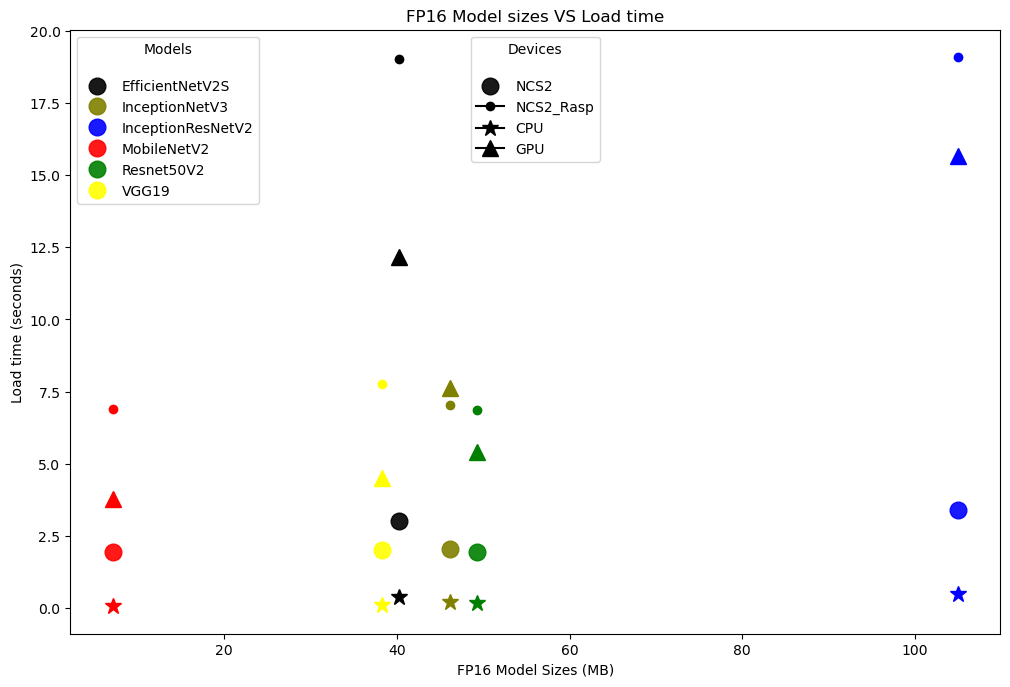

In [11]:
import matplotlib.pyplot as plt

colors = {'MobileNetV2':'red', 'Resnet50V2':'green', 'InceptionResNetV2':'blue', 'VGG19':'yellow', 'InceptionNetV3':'olive' , 'EfficientNetV2S':'black'}

groups = df.groupby('model')
for name, group in groups:
    plt.plot(group.sizes, group.NCS2, marker='o', linestyle='', alpha=0.9, markersize=12, label=name, color=colors[name])
    plt.plot(group.sizes, group.NCS2_Rasp, marker='.', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.CPU, marker='*', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.GPU, marker='^', markersize=12, color=colors[name])

first_leg=plt.legend(title="Models\n")
plt.xlabel('FP16 Model Sizes (MB)')
plt.ylabel('Load time (seconds)')
plt.title('FP16 Model sizes VS Load time')
plt.gca().add_artist(first_leg)
plt.legend(['NCS2','NCS2_Rasp','CPU','GPU'], loc='upper center', title="Devices\n")
plt.show()

# FP32 Model size VS Load time

In [3]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'sizes'    :[13.7, 98.1, 208, 91.6, 76.5, 78.4],
                   'NCS2'     :[2.0132, 2.1107, 3.6791, 2.0608, 2.0712, 3.2036],
                   'NCS2_Rasp':[8.1615, 8.4460, 24.7394, 8.2744, 8.6501, 19.5176],
                   'CPU'      :[0.1163, 0.2501, 0.6670, 0.1445, 0.2848, 0.4572],
                   'GPU'      :[4.4413, 6.4578, 16.5807, 4.6860, 7.9319, 12.3654],
                   
                   'model'    :['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']})

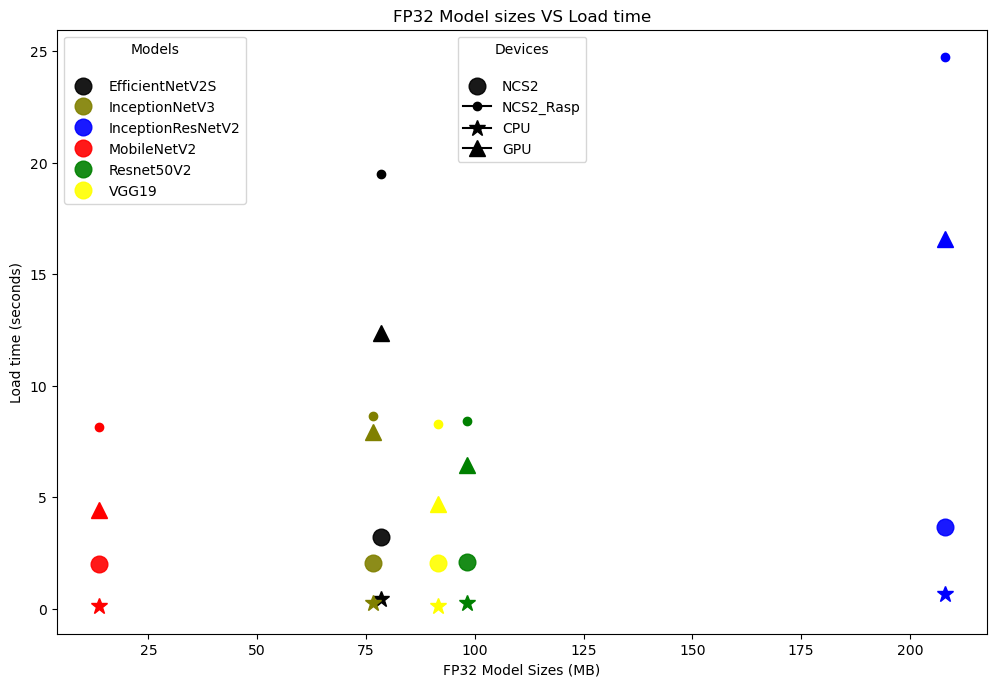

In [4]:
import matplotlib.pyplot as plt

colors = {'MobileNetV2':'red', 'Resnet50V2':'green', 'InceptionResNetV2':'blue', 'VGG19':'yellow', 'InceptionNetV3':'olive', 'EfficientNetV2S':'black'}

groups = df.groupby('model')
for name, group in groups:
    plt.plot(group.sizes, group.NCS2, marker='o', linestyle='', alpha=0.9, markersize=12, label=name, color=colors[name])
    plt.plot(group.sizes, group.NCS2_Rasp, marker='.', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.CPU, marker='*', markersize=12, color=colors[name])
    plt.plot(group.sizes, group.GPU, marker='^', markersize=12, color=colors[name])

first_leg=plt.legend(title="Models\n")
plt.xlabel('FP32 Model Sizes (MB)')
plt.ylabel('Load time (seconds)')
plt.title('FP32 Model sizes VS Load time')
plt.gca().add_artist(first_leg)
plt.legend(['NCS2','NCS2_Rasp','CPU','GPU'], loc='upper center', title="Devices\n")
plt.show()